# Laboratorio 2

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    heterogeneidad, concentración 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

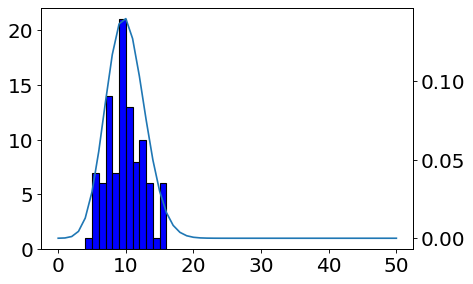

In [3]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


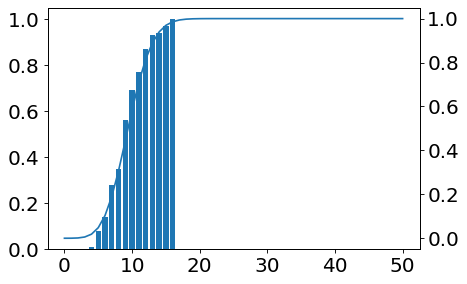

In [4]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [5]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.41  teórica:  10.0
varianza empírica: 7.481899999999996  teórica:  8.0
asimetría empírica: 0.3673704568972458 teórica:  0.21213203435596423
curtosis empírico:  -0.2585096236887767 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)


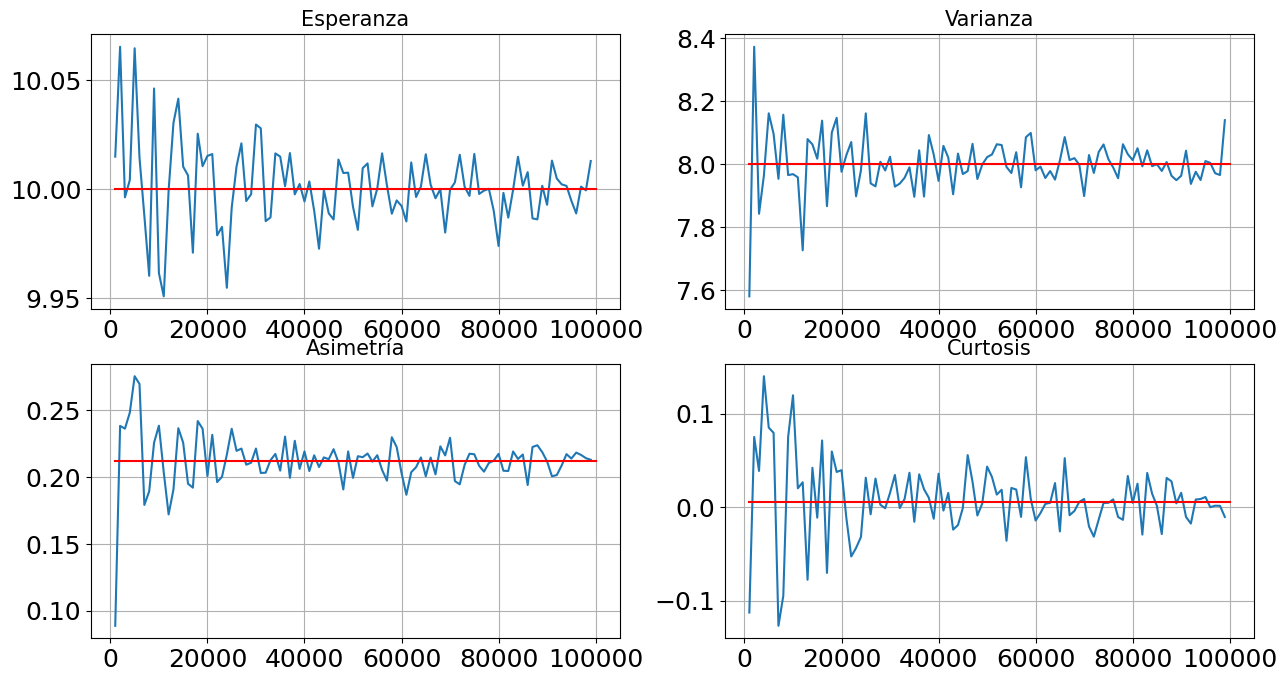

In [6]:
##Pregunta 1
size=range(1000, 100000, 1000)
n=50
p=0.2

avgs=[]
var=[]
asims=[]
kurtos=[]

for i in size:
    datos_bin =stats.binom.rvs(n=n, p=p, size=i) 
    promedio = sum(datos_bin)/i
    var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/i
    asim = stats.skew(datos_bin)
    curtos = stats.kurtosis(datos_bin)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
y=range(-5, 20, 5)

fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (n*p, n*p), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (n*p*(1-p), n*p*(1-p)), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), ((1-2*p)/(math.sqrt(n*p*(1-p))), (1-2*p)/(math.sqrt(n*p*(1-p)))), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), ((1-6*p*(1-p))/(n*p*(1-p)), (1-6*p*(1-p))/(n*p*(1-p))), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

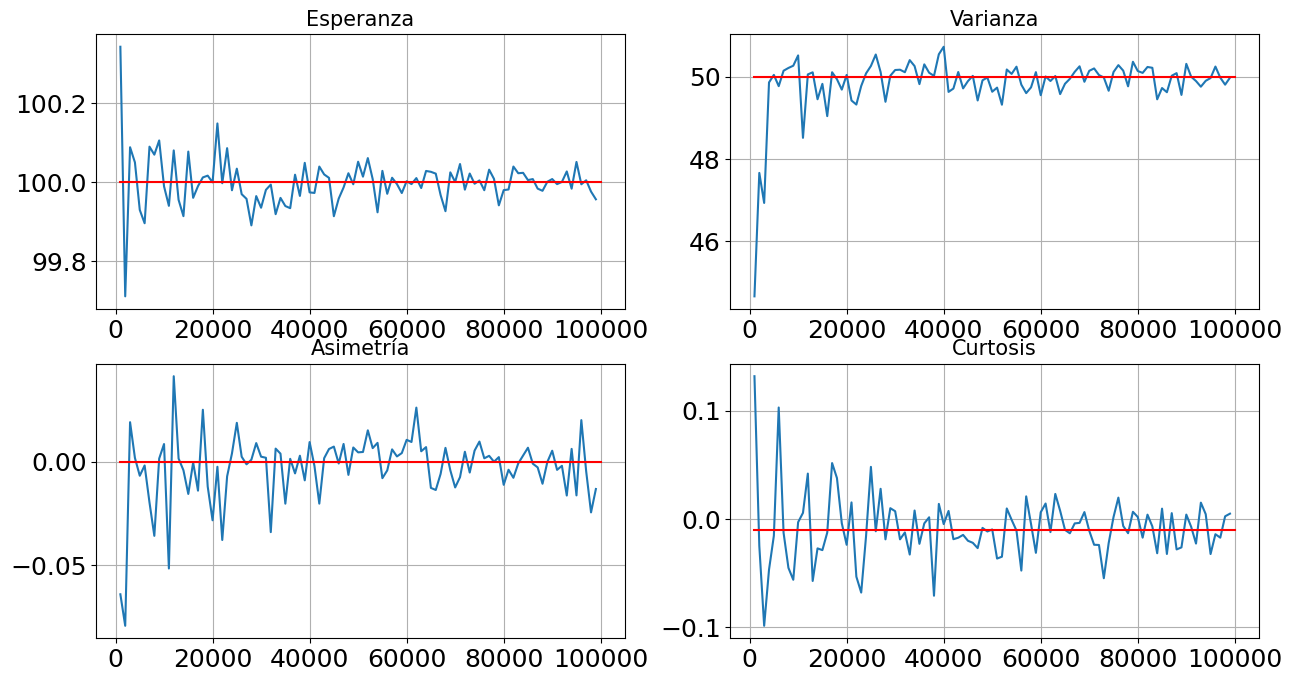

In [7]:
##Pregunta 2
size=range(1000, 100000, 1000)
n=200
p=0.5

avgs=[]
var=[]
asims=[]
kurtos=[]

for i in size:
    datos_bin =stats.binom.rvs(n=n, p=p, size=i) 
    promedio = sum(datos_bin)/i
    var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/i
    asim = stats.skew(datos_bin)
    curtos = stats.kurtosis(datos_bin)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
y=range(-5, 20, 5)

fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (n*p, n*p), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (n*p*(1-p), n*p*(1-p)), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), ((1-2*p)/(math.sqrt(n*p*(1-p))), (1-2*p)/(math.sqrt(n*p*(1-p)))), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), ((1-6*p*(1-p))/(n*p*(1-p)), (1-6*p*(1-p))/(n*p*(1-p))), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

#### Ejercicio 1 Respuestas:
1) A partir de los resultados mostrados en los gráficos, podemos decir que para n=50 y p=0.2 se necesitan alrededor de 40000 simulaciones para acercarse a los valores teóricos.

2)Si cambiamos los valores de n y p, la cantidad de simulaciones necesarias sigue siendo alrededor de 40000

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

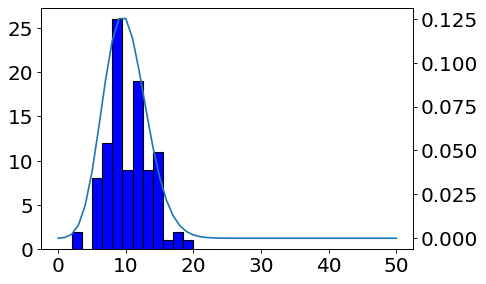

In [8]:
## simulación de size valores v.a. de poisson
size=100
k=50
mu=10
datos_poi =stats.poisson.rvs(mu=mu,loc=0, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poi, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(k+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()

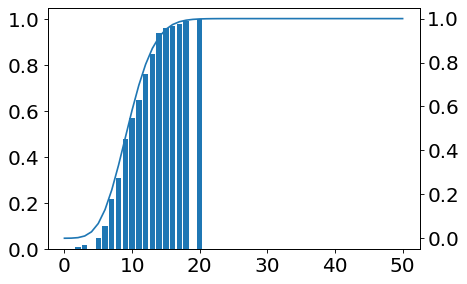

In [9]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_poi = ecdf(datos_poi)
ax.bar(x,cum_poi)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(k+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()


In [10]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poi)/size
var_emp = sum((datos_poi - promedio)*(datos_poi-promedio))/size
asim = stats.skew(datos_poi)
curtos = stats.kurtosis(datos_poi)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', mu)
print('asimetría empírica:', asim, 'teórica: ',1/(math.sqrt(mu)))
print('curtosis empírico: ', curtos, 'teórico: ',3+(1/mu))

esperanza empírica: 10.13  teórica:  10
varianza empírica: 10.033100000000001  teórica:  10
asimetría empírica: 0.27737312718306284 teórica:  0.31622776601683794
curtosis empírico:  0.22708745644544948 teórico:  3.1


1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

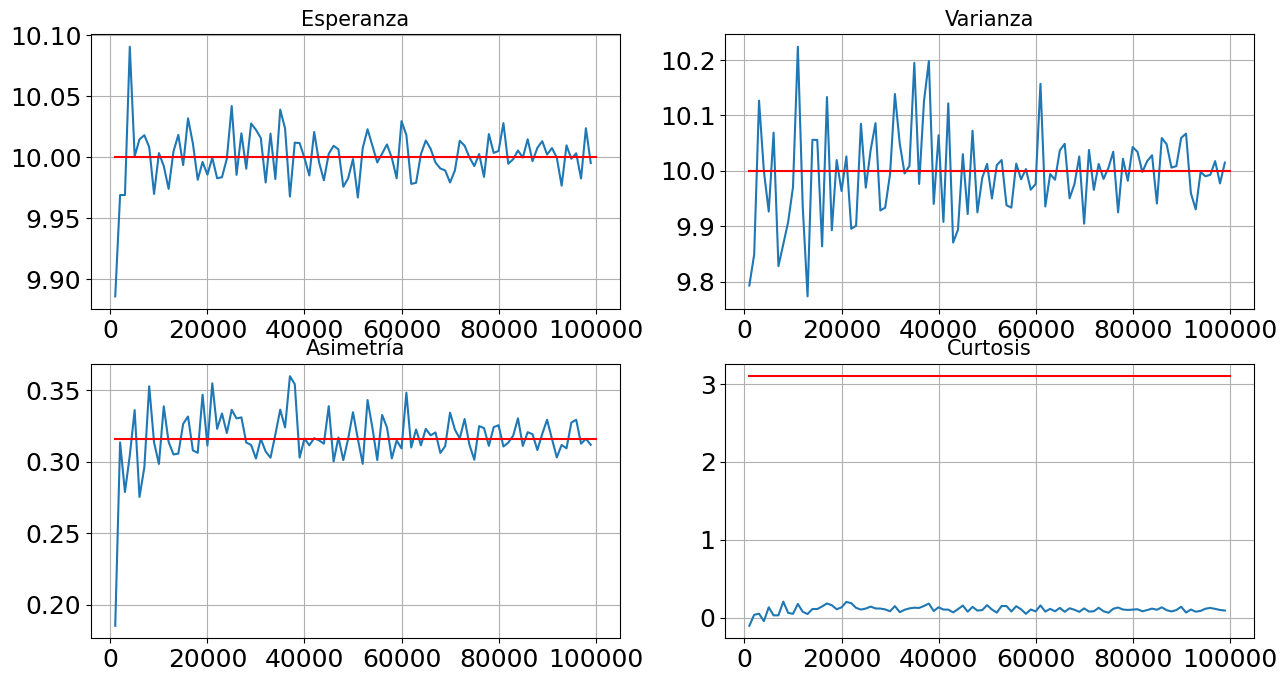

In [11]:
size=range(1000, 100000, 1000)
k=50
mu=10

avgs=[]
var=[]
asims=[]
kurtos=[]
for i in size:
    datos_poi=stats.poisson.rvs(mu=mu,loc=0, size=i)
    promedio = sum(datos_poi)/i
    var_emp = sum((datos_poi - promedio)*(datos_poi-promedio))/i
    asim = stats.skew(datos_poi)
    curtos = stats.kurtosis(datos_poi)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (1/(math.sqrt(mu)), 1/(math.sqrt(mu))), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (3+(1/mu), 3+(1/mu)), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

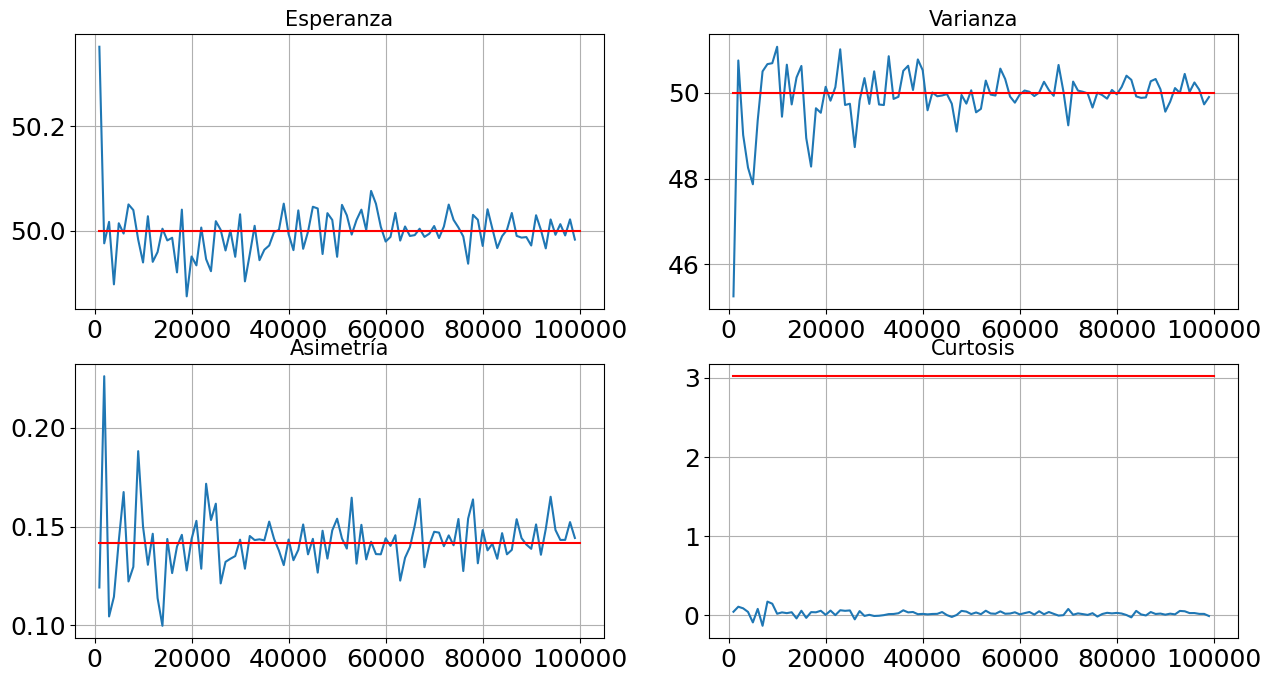

In [12]:
size=range(1000, 100000, 1000)
k=100
mu=50

avgs=[]
var=[]
asims=[]
kurtos=[]
for i in size:
    datos_poi=stats.poisson.rvs(mu=mu,loc=0, size=i)
    promedio = sum(datos_poi)/i
    var_emp = sum((datos_poi - promedio)*(datos_poi-promedio))/i
    asim = stats.skew(datos_poi)
    curtos = stats.kurtosis(datos_poi)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (1/(math.sqrt(mu)), 1/(math.sqrt(mu))), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize
=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (3+(1/mu), 3+(1/mu)), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

#### Ejercicio 2

1) Se necesitan alrededor de 20000 simulaciones para que los valores se acerquen a los teóricos

2)Si cambiamos los valores de k y mu, la cantidad de simulaciones se mantiene

Tambien es importante mencionar que la curtosis simulada nunca sera igual a la teorica, esto es debido a que la formula teorica siempre se le sumara 3

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generabdora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

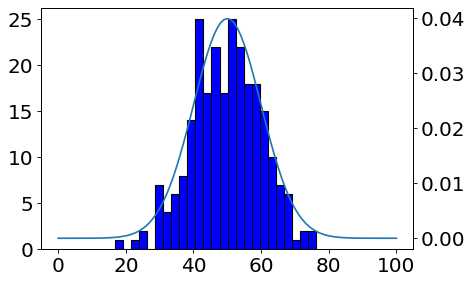

In [13]:
## simulación de size valores v.a. normal
size=250
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


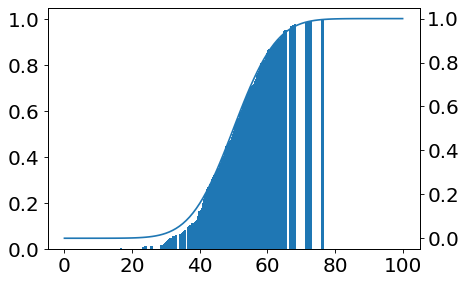

In [14]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [15]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 49.69842262902419  teórica:  50
varianza empírica: 103.93746784098748  teórica:  100
asimetría empírica: -0.1185392953225358 teórica:  0
curtosis empírico:  0.0009082838148022354 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

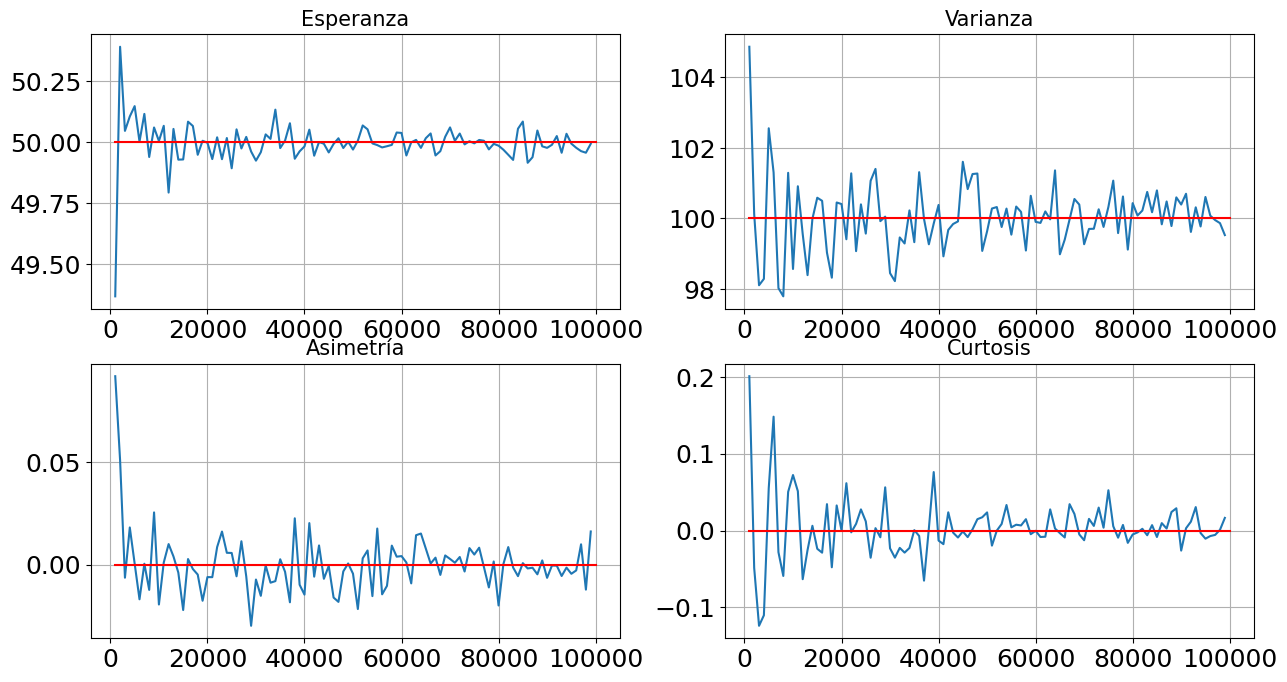

In [16]:
##Pregunta 1
size=range(1000, 100000, 1000)
mu=50
sigma=10

avgs=[]
var=[]
asims=[]
kurtos=[]

for i in size:
    datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=i)  
    promedio = sum(datos_norm)/i
    var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/i
    asim = stats.skew(datos_norm)
    curtos = stats.kurtosis(datos_norm)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
y=range(-5, 20, 5)

fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (sigma*sigma, sigma*sigma), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (0, 0), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (0, 0), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

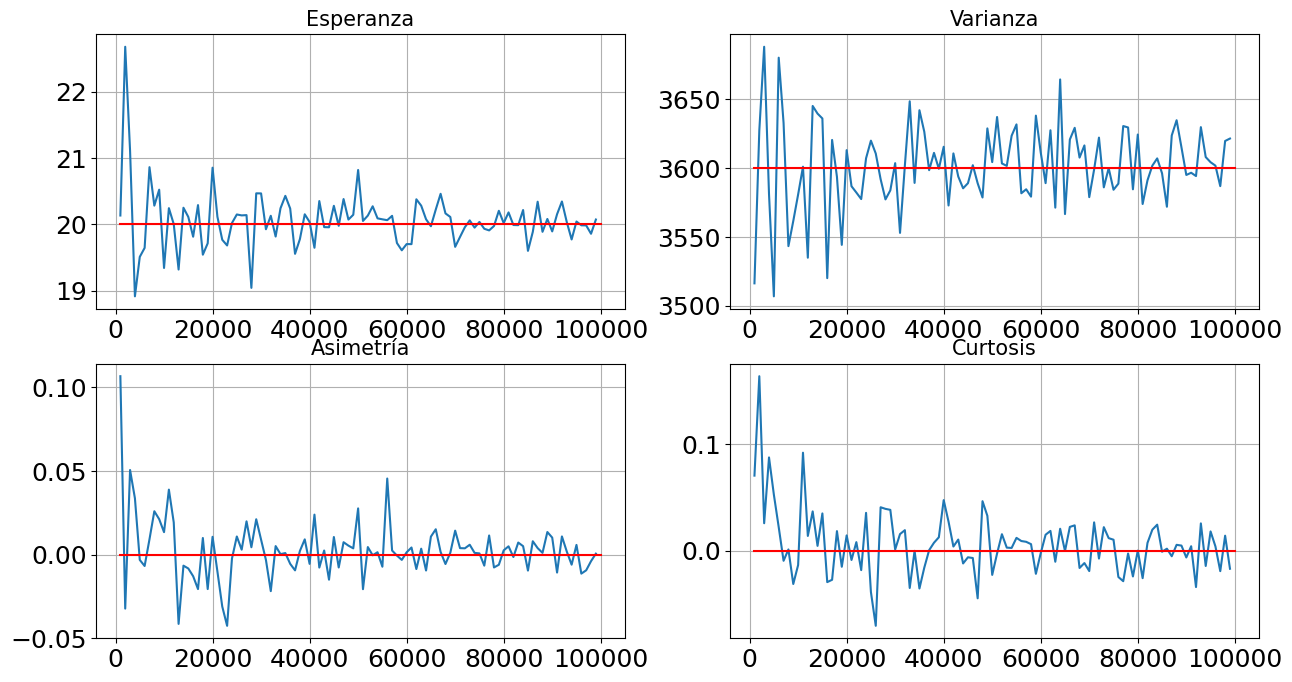

In [17]:
##Pregunta 2
size=range(1000, 100000, 1000)
mu=20
sigma=60

avgs=[]
var=[]
asims=[]
kurtos=[]

for i in size:
    datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=i)  
    promedio = sum(datos_norm)/i
    var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/i
    asim = stats.skew(datos_norm)
    curtos = stats.kurtosis(datos_norm)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
y=range(-5, 20, 5)

fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (mu, mu), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (sigma*sigma, sigma*sigma), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (0, 0), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (0, 0), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

#### Ejercicio 3 Respuestas

1)Al igual que en la distribución binomial, se necesitan alrededor de 40000 simulaciones

2)Si cambiamos los valores de mu y sigma, la cantidad de simulaciones necesarias no varía respecto a la pregunta 1

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída exponencial de tasa $\lambda$

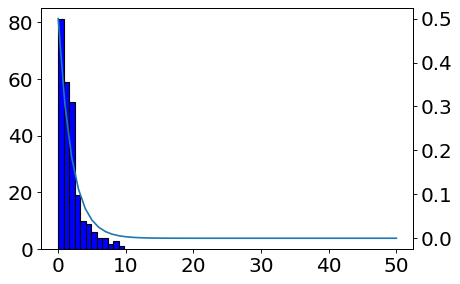

In [18]:
## simulación de size valores v.a. distribución exponencial
size=250
l=0.5
k=50
datos_exp =stats.expon.rvs(scale= 1/l, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_exp, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i, scale= 1/l))
ax2.plot(vec,pvec)
plt.draw()

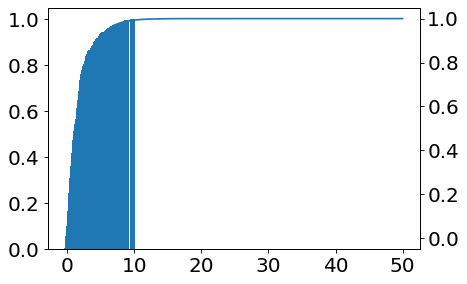

In [19]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_exp = ecdf(datos_exp)
ax.bar(x,cum_exp)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(k+1))
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, scale=1/l))
ax2.plot(vec,pvec)
plt.draw()


In [20]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_exp)/size
var_emp = sum((datos_exp - promedio)*(datos_exp-promedio))/size
asim = stats.skew(datos_exp)
curtos = stats.kurtosis(datos_exp)
print('esperanza empírica:',promedio,' teórica: ',1/l)
print('varianza empírica:',var_emp,' teórica: ', 1/(l**2))
print('asimetría empírica:', asim, 'teórica: ',2)
print('curtosis empírico: ', curtos, 'teórico: ',9)


esperanza empírica: 1.8821400956125183  teórica:  2.0
varianza empírica: 3.3048044477328062  teórica:  4.0
asimetría empírica: 1.860073093446285 teórica:  2
curtosis empírico:  3.6739701742663167 teórico:  9


1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

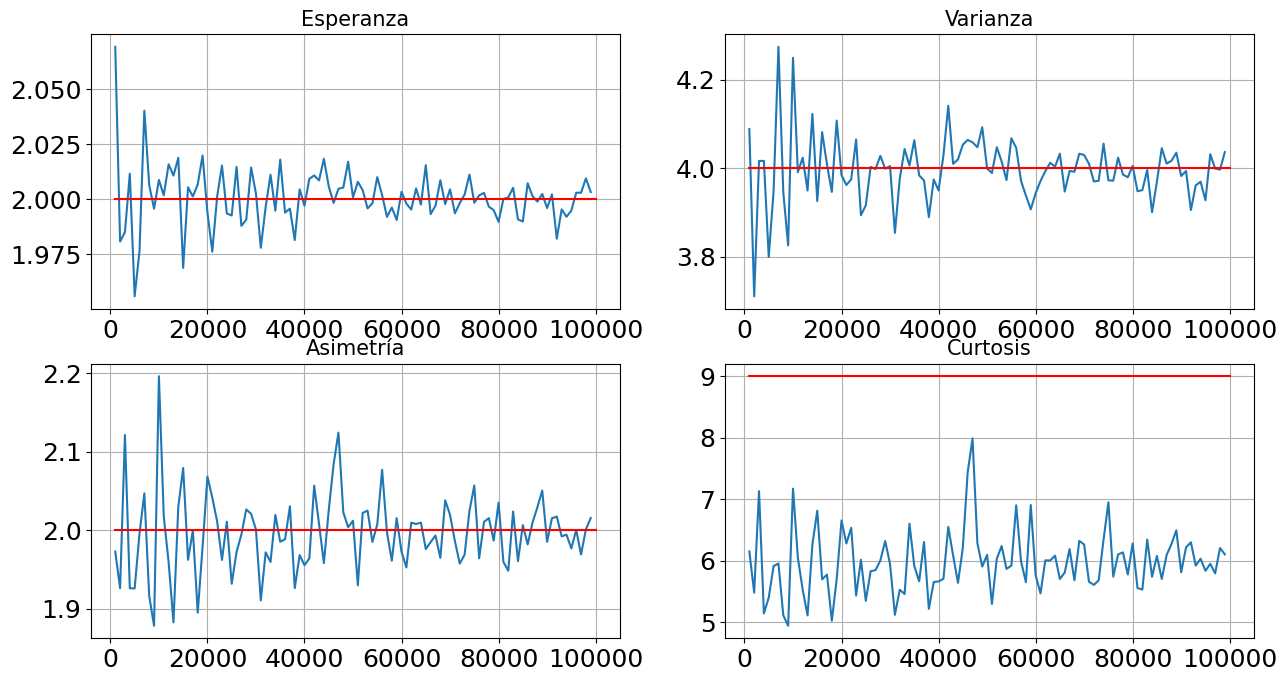

In [21]:
size=range(1000, 100000, 1000)
l=0.5
k=50

avgs=[]
var=[]
asims=[]
kurtos=[]
for i in size:
    datos_exp =stats.expon.rvs(scale= 1/l, size=i)
    promedio = sum(datos_exp)/i
    var_emp = sum((datos_exp - promedio)*(datos_exp-promedio))/i
    asim = stats.skew(datos_exp)
    curtos = stats.kurtosis(datos_exp)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (1/l, 1/l), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (1/(l**2), 1/(l**2)), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (2, 2), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (9, 9), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

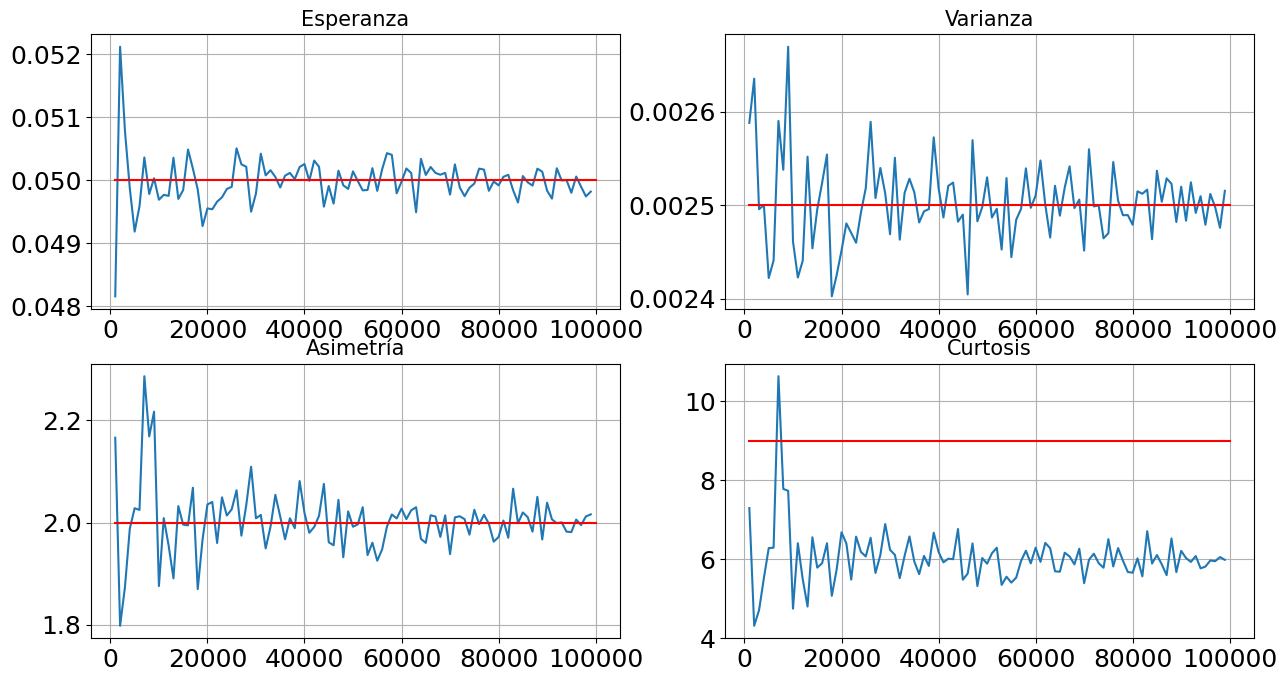

In [22]:
size=range(1000, 100000, 1000)
l=20
k=100

avgs=[]
var=[]
asims=[]
kurtos=[]
for i in size:
    datos_exp =stats.expon.rvs(scale= 1/l, size=i)
    promedio = sum(datos_exp)/i
    var_emp = sum((datos_exp - promedio)*(datos_exp-promedio))/i
    asim = stats.skew(datos_exp)
    curtos = stats.kurtosis(datos_exp)
    avgs.append(promedio)
    var.append(var_emp)
    asims.append(asim)
    kurtos.append(curtos)
    
fig1, f1_axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
##Esperanza
f1_axes[0,0].plot(size, avgs)
f1_axes[0,0].plot((1000, 100000), (1/l, 1/l), color='r')
f1_axes[0,0].set_title('Esperanza', fontsize=15)
f1_axes[0,0].grid(True)
#plt.show()
##Varianza
f1_axes[0,1].plot(size, var)
f1_axes[0,1].plot((1000, 100000), (1/(l**2), 1/(l**2)), color='r')
f1_axes[0,1].set_title('Varianza', fontsize=15)
f1_axes[0,1].grid(True)
#plt.show()
##Asimetría
f1_axes[1,0].plot(size, asims)
f1_axes[1,0].plot((1000, 100000), (2, 2), color='r')
f1_axes[1,0].set_title('Asimetría', fontsize=15)
f1_axes[1,0].grid(True)
#plt.show()
##Curtosis
f1_axes[1,1].plot(size, kurtos)
f1_axes[1,1].plot((1000, 100000), (9, 9), color='r')
f1_axes[1,1].set_title('Curtosis', fontsize=15)
f1_axes[1,1].grid(True)

plt.show()

#### Ejercicio 4

1)Se necesitan alrededor de 20000 simulaciones para alcanzar valores parecidos a los teóricos

2)Si se cambian los valores de l y k, se necesitan alrededor de 20000 simulaciones para alcanzar valores lo más parecidos posible a los teóricos

#### Ejercicio 5: 
Utilice datos de clima de Valdivia, escoja un parámetro diario(temperatura promedio, mínima o máxima, agua caída, etc) y grafique el histograma de un año completo y luego separe por estación del año y grafique 4 histogramas.  Compare y concluya.

In [23]:
# Read in data
temperature = pd.read_csv('data/390006_2019_Temperatura_.csv', sep=';')

new = temperature['momento'].str.split(' ', n = 1, expand = True)
dates = []
for day in new[0]:
    tmp = day.split('-') #tmp = [day, month, year]
    dates.append('{}-{}-{}'.format(tmp[1], tmp[0], tmp[2]))
    
temperature['day']=dates
temperature.drop(columns =['momento'], inplace = True)
temperature.drop(columns =['CodigoNacional'], inplace = True)

#temperatura promedio
temperature=temperature.groupby('day').mean()

temperature.to_csv('data/formatted_temperature2019.csv')

In [24]:
temperature = pd.read_csv('data/formatted_temperature2019.csv')
temperature['Ts_Valor'].describe()

count    360.000000
mean      11.114668
std        3.979104
min        1.908696
25%        8.428125
50%       11.556250
75%       13.979167
max       23.670833
Name: Ts_Valor, dtype: float64

In [25]:
temperature.head(10)

,day,Ts_Valor
0,01-01-2019,14.770833
1,01-02-2019,13.187500
2,01-03-2019,13.066667
3,01-04-2019,17.750000
4,01-05-2019,18.700000
5,01-06-2019,13.262500
6,01-07-2019,13.141667
7,01-08-2019,12.391667
8,01-09-2019,12.166667
9,01-10-2019,10.633333


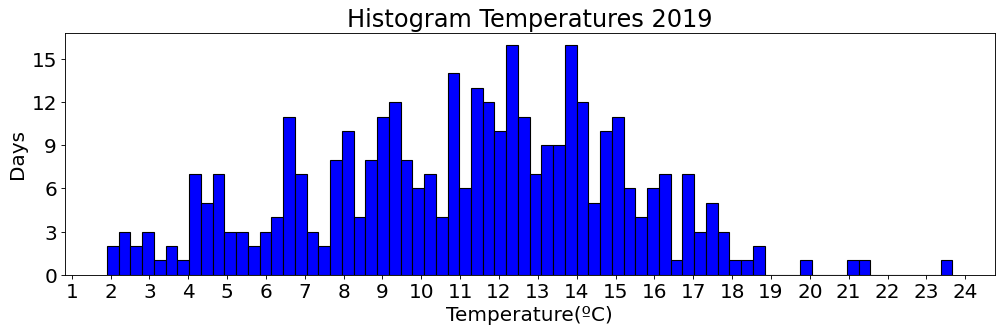

365

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(15, 4), dpi=80)

# Make the histogram using matplotlib, bins must be integet
ax.hist(temperature['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(temperature['Ts_Valor'].count()//5))

plt.title('Histogram Temperatures 2019')
plt.xlabel('Temperature(ºC)'); plt.ylabel('Days');
plt.xticks(np.arange(1, 25, 1))
plt.yticks(np.arange(0, 18, 3))

plt.show()
len(temperature['Ts_Valor'])

In [505]:
Summer = temperature.set_index('day').loc['01-01-2019':'03-20-2019'].append(temperature.set_index('day').loc['12-21-2019':'12-31-2019'])
Autumn = temperature.set_index('day').loc['03-21-2019':'06-20-2019']
Winter = temperature.set_index('day').loc['06-21-2019':'09-20-2019']
Spring = temperature.set_index('day').loc['09-21-2019':'12-20-2019']

In [506]:
Summer

,Ts_Valor
day,
01-01-2019,14.770833
01-02-2019,13.187500
01-03-2019,13.066667
01-04-2019,17.750000
01-05-2019,18.700000
...,...
12-27-2019,12.495833
12-28-2019,17.108333
12-29-2019,15.200000


In [507]:
Autumn

,Ts_Valor
day,
03-21-2019,11.283333
03-22-2019,14.658333
03-23-2019,15.066667
03-24-2019,11.320833
03-25-2019,13.925000
...,...
06-16-2019,4.716667
06-17-2019,2.983333
06-18-2019,8.362500


In [508]:
Winter

,Ts_Valor
day,
06-21-2019,10.779167
06-22-2019,12.487500
06-23-2019,11.416667
06-24-2019,6.895833
06-25-2019,6.100000
...,...
09-16-2019,5.608333
09-17-2019,7.970833
09-18-2019,8.829167


In [509]:
Spring

,Ts_Valor
day,
09-21-2019,8.804167
09-22-2019,6.641667
09-23-2019,8.187500
09-24-2019,13.354167
09-25-2019,14.829167
...,...
12-16-2019,14.566667
12-17-2019,13.900000
12-18-2019,15.604167


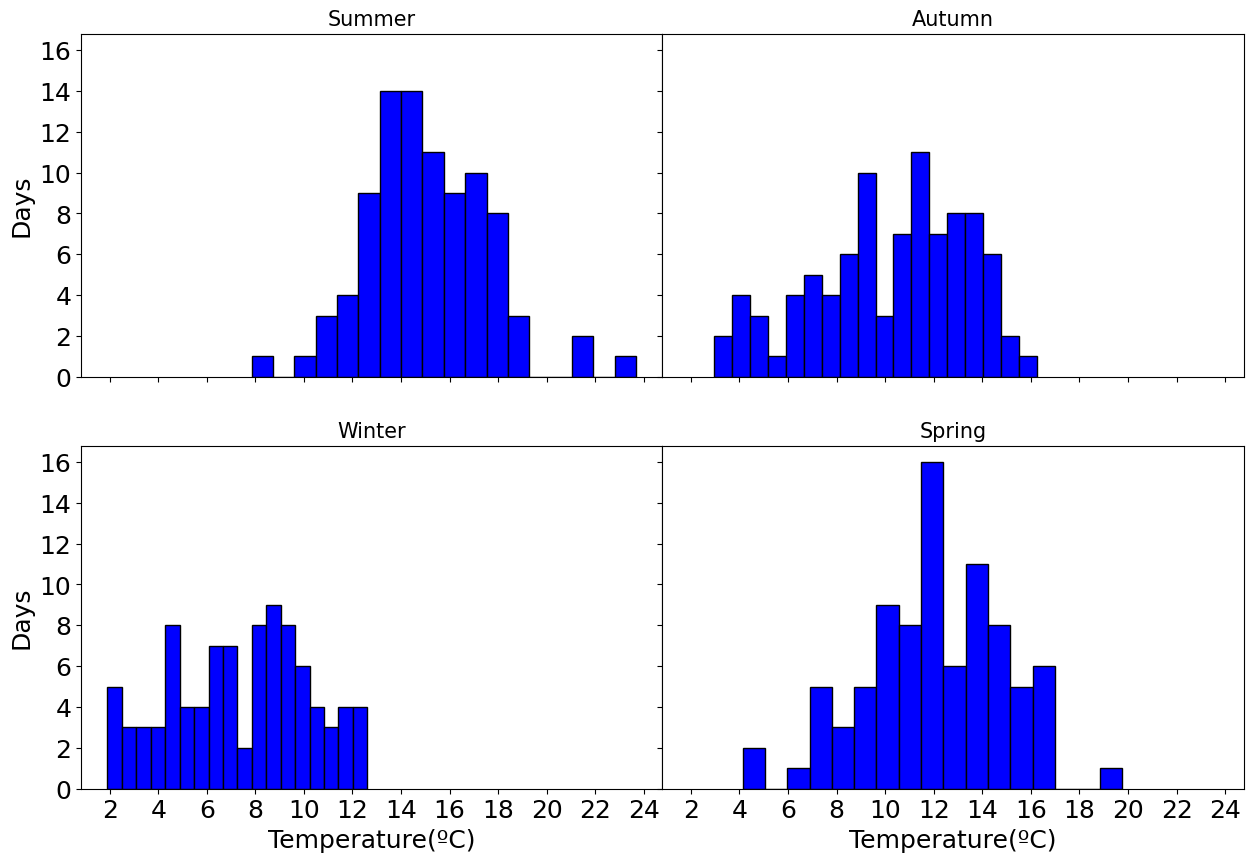

In [510]:
#Seasons histograms
fig, ax = plt.subplots(2, 2,figsize=(15, 10), dpi=100, sharex=True, sharey=True, gridspec_kw={'wspace': 0})

# Make the histogram using matplotlib, bins must be integet
ax[0,0].hist(Summer['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Summer['Ts_Valor'].count()//5))
ax[0,0].set_title('Summer', fontsize=15)
ax[0,1].hist(Autumn['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Autumn['Ts_Valor'].count()//5))
ax[0,1].set_title('Autumn', fontsize=15)
ax[1,0].hist(Winter['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Winter['Ts_Valor'].count()//5))
ax[1,0].set_title('Winter', fontsize=15)
ax[1,1].hist(Spring['Ts_Valor'], color = 'blue', edgecolor = 'black', bins=(Spring['Ts_Valor'].count()//5))
ax[1,1].set_title('Spring', fontsize=15)

for a in ax.flat:
    a.set(xlabel='Temperature(ºC)', ylabel='Days')
    
for a in ax.flat:
    a.label_outer()
    
plt.setp(ax, xticks=range(2, 25, 2), yticks=range(0, 18, 2))
plt.show()

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb

Datos de clima:https://climatologia.meteochile.gob.cl/application/historicos/datosDescarga/390006